In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [2]:
df_train = pd.read_csv("train.csv")
df_train.shape

(891, 12)

In [3]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.shape

(891, 12)

In [8]:
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [13]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [14]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(age_approx, axis=1)

In [15]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [16]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [18]:
df_train_dummied = pd.get_dummies(df_train, columns=['Sex'])

In [19]:
df_train_dummied = pd.get_dummies(df_train_dummied,columns=["Embarked"])

In [20]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

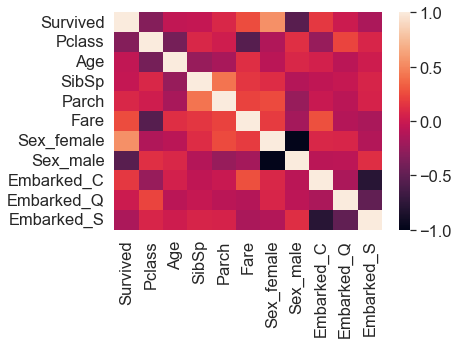

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [22]:
used_features = ["Pclass", "Age", "SibSp", "Parch", "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S" ]

X = df_train_dummied[used_features].values
y = df_train_dummied['Survived']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [26]:
LogReg = LogisticRegression()

In [27]:
LogReg.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = LogReg.predict(X_test)

In [29]:
metrics.confusion_matrix(y_test, y_pred)

array([[143,  23],
       [ 22,  79]], dtype=int64)

In [30]:
metrics.accuracy_score(y_test, y_pred)

0.8314606741573034

In [31]:
len(X_test)

267

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [33]:
LogReg.coef_

array([[-1.0417637 , -0.03988722, -0.24209473, -0.040671  ,  1.19325293,
        -1.19486922,  0.34889847, -0.03763003, -0.31288474]])

In [34]:
LogReg.intercept_

array([3.65703961])

In [35]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [36]:
LogReg.predict_proba(X_test)

array([[0.26542878, 0.73457122],
       [0.39679237, 0.60320763],
       [0.94737941, 0.05262059],
       [0.25938339, 0.74061661],
       [0.94407754, 0.05592246],
       [0.13499511, 0.86500489],
       [0.33311125, 0.66688875],
       [0.51908164, 0.48091836],
       [0.78160954, 0.21839046],
       [0.40732158, 0.59267842],
       [0.7400807 , 0.2599193 ],
       [0.21160816, 0.78839184],
       [0.74856456, 0.25143544],
       [0.14560812, 0.85439188],
       [0.86454037, 0.13545963],
       [0.36944516, 0.63055484],
       [0.89369867, 0.10630133],
       [0.29767551, 0.70232449],
       [0.17636522, 0.82363478],
       [0.39882383, 0.60117617],
       [0.90485706, 0.09514294],
       [0.55268564, 0.44731436],
       [0.86431483, 0.13568517],
       [0.93741383, 0.06258617],
       [0.51637091, 0.48362909],
       [0.51592224, 0.48407776],
       [0.03916068, 0.96083932],
       [0.86914402, 0.13085598],
       [0.89801797, 0.10198203],
       [0.32517759, 0.67482241],
       [0.